In [2]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import mysql.connector
import pandas as pd
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Pravin',
    database='coffee_sales')

In [4]:
query = "SELECT * FROM coffee_shop_sales"
df = pd.read_sql(query,conn)
df.head()

C:\Users\ghjk\AppData\Local\Temp\ipykernel_7940\374868714.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,conn)


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,0 days 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,0 days 07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,0 days 07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,0 days 07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,0 days 07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,0 days 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,0 days 07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,0 days 07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,0 days 07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,0 days 07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [7]:
df.dtypes

transaction_id                int64
transaction_date             object
transaction_time    timedelta64[ns]
transaction_qty               int64
store_id                      int64
store_location               object
product_id                    int64
unit_price                  float64
product_category             object
product_type                 object
product_detail               object
dtype: object

In [8]:
#Changing datatatype of trnsaction_date to date
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%m/%d/%Y')

In [9]:
df.dtypes

transaction_id                int64
transaction_date     datetime64[ns]
transaction_time    timedelta64[ns]
transaction_qty               int64
store_id                      int64
store_location               object
product_id                    int64
unit_price                  float64
product_category             object
product_type                 object
product_detail               object
dtype: object

In [10]:
#Removing 0 days from time column
df['transaction_time'] = df['transaction_time'].astype(str).str.split(" ").str[-1]

In [11]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [12]:
#Changing the datatype of time column
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.time
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [13]:
df.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

# Feature Engineering

1. KPI's

In [15]:
df['revenue'] = df['transaction_qty'] * df['unit_price']
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,revenue
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2


# Time intelligence

In [16]:
df['transaction_date'].dt.month_name()

0         January
1         January
2         January
3         January
4         January
           ...   
149111       June
149112       June
149113       June
149114       June
149115       June
Name: transaction_date, Length: 149116, dtype: object

In [17]:
df['month_name'] = df['transaction_date'].dt.month_name()
df['weekday'] = df['transaction_date'].dt.day_name()
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,revenue,month_name,weekday
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,January,Sunday
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,January,Sunday
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,January,Sunday
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,January,Sunday
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,January,Sunday


In [18]:
#Extract Hour from Time (Peak Hour Analysis)
df['hour'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.hour

In [19]:
#Average Order Value (AOV Preparation)
aov = df.groupby('transaction_id')['revenue'].sum().mean()
aov

np.float64(4.686367190643527)

# Data Analysis with Business Insights

In [20]:
daily_sales = df.groupby('month_name')['revenue'].sum()
daily_sales

month_name
April       118941.08
February     76145.19
January      81677.74
June        166485.88
March        98834.68
May         156727.76
Name: revenue, dtype: float64

In [21]:
hourly_sales = df.groupby('hour')['revenue'].sum().sort_values(ascending=False)
hourly_sales

hour
10    88673.39
9     85169.53
8     82699.87
7     63526.47
11    46319.14
15    41733.10
14    41304.74
16    41122.75
13    40367.45
12    40192.79
17    40134.31
18    34286.20
19    28446.68
6     21900.27
20     2935.64
Name: revenue, dtype: float64

In [22]:
#Store Performance Camparison
store_sales = df.groupby('store_location')['revenue'].sum().sort_values(ascending=False)
store_sales

store_location
Hell's Kitchen     236511.17
Astoria            232243.91
Lower Manhattan    230057.25
Name: revenue, dtype: float64

In [23]:
df['product_category'].unique()

array(['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 'Flavours',
       'Loose Tea', 'Coffee beans', 'Packaged Chocolate', 'Branded'],
      dtype=object)

In [24]:
#High Volume vs High Revenue Product
product_analysis = df.groupby('product_category').agg(total_qty=('transaction_qty','sum'),total_revenue=('revenue','sum')
                                                     ).sort_values('total_qty',ascending=False)
product_analysis

,total_qty,total_revenue
product_category,,
Coffee,89250,269952.45
Tea,69737,196405.95
Bakery,23214,82315.64
Drinking Chocolate,17457,72416.00
Flavours,10511,8408.80
Coffee beans,1828,40085.25
Loose Tea,1210,11213.60
Branded,776,13607.00
Packaged Chocolate,487,4407.64


In [25]:
product_analysis.to_csv('analysis.csv')

- Morning hours generates highest revenue -> focus promotions before 11 AM
- Coffee category dominates revenue -> core product line
- All stores perform same -> location strategy matters
- Premium drinks have lower volume but higher revenue -> upsell potential

In [26]:
df.groupby('hour')['revenue'].sum().index

Index([6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], dtype='int32', name='hour')

In [27]:
df.groupby('hour')['revenue'].sum().values

array([21900.27, 63526.47, 82699.87, 85169.53, 88673.39, 46319.14,
       40192.79, 40367.45, 41304.74, 41733.1 , 41122.75, 40134.31,
       34286.2 , 28446.68,  2935.64])

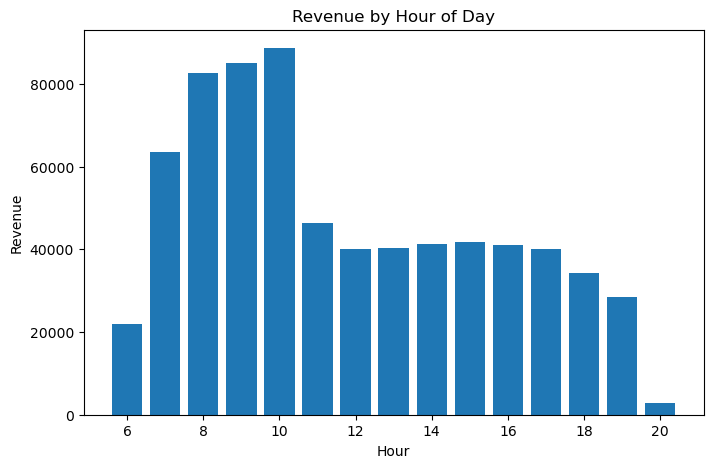

In [29]:
#Revenue by hours
hourly_Sales = df.groupby('hour')['revenue'].sum()

plt.figure(figsize=(8,5))
plt.bar(hourly_Sales.index, hourly_Sales.values)
plt.title('Revenue by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Revenue')
plt.show()

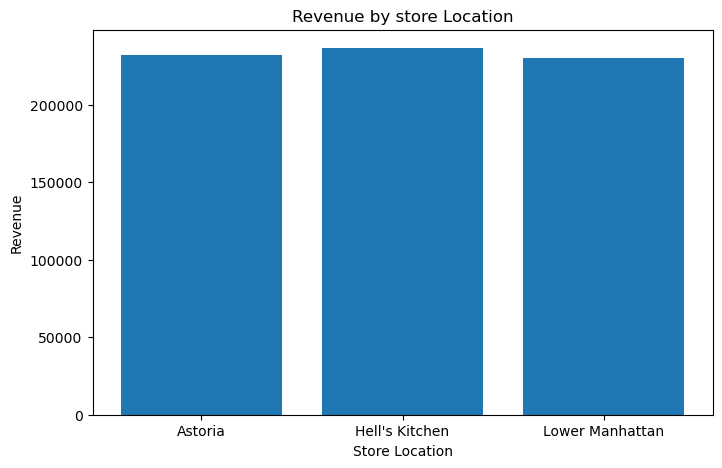

In [33]:
#Revenue by store
store_sales = df.groupby('store_location')['revenue'].sum()

plt.figure(figsize=(8,5))
plt.bar(store_sales.index, store_sales.values)
plt.title('Revenue by store Location')
plt.xlabel('Store Location')
plt.ylabel('Revenue')
plt.show()

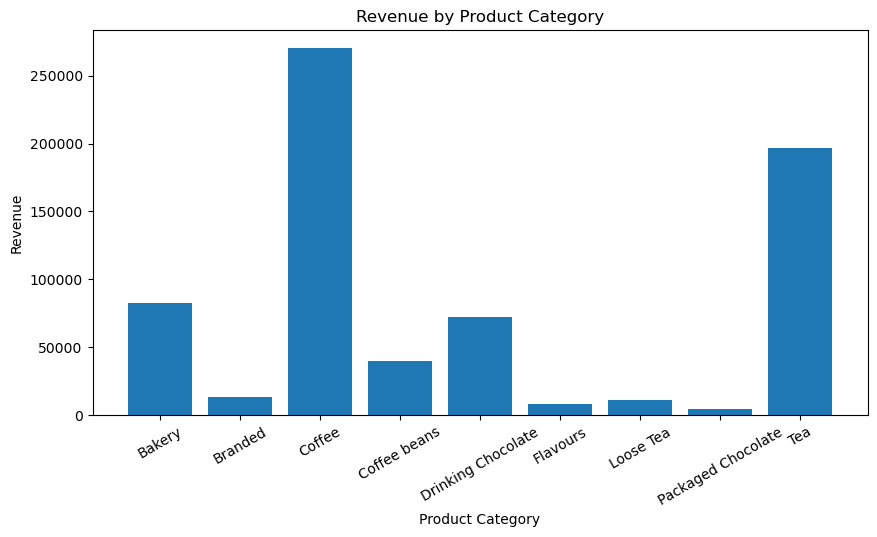

In [34]:
# Product by category
category_sales = df.groupby('product_category')['revenue'].sum()

plt.figure(figsize=(10,5))
plt.bar(category_sales.index, category_sales.values)
plt.title('Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.xticks(rotation=30)
plt.show()

<Axes: xlabel='product_category', ylabel='count'>

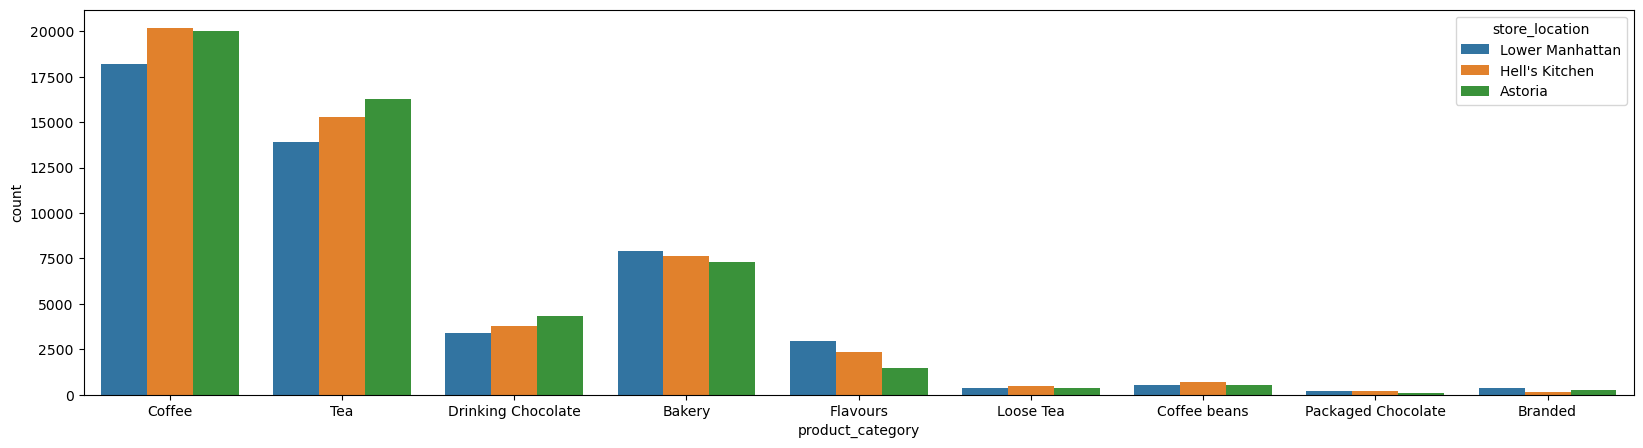

In [36]:
plt.figure(figsize = (20,5))
sns.countplot(x = df['product_category'], hue = df['store_location'])

# Unstack Function

In [37]:
data = pd.DataFrame({
    'City': ['Delhi', 'Delhi', 'Mumbai', 'Mumbai'],
    'Product': ['Laptop', 'Mobile', 'Laptop', 'Mobile'],
    'Sales': [250,300,400,500]})

In [38]:
data

,City,Product,Sales
0,Delhi,Laptop,250
1,Delhi,Mobile,300
2,Mumbai,Laptop,400
3,Mumbai,Mobile,500


In [40]:
data.groupby(['City','Product'])['Sales'].sum()
#group by creates two indexes in series

City    Product
Delhi   Laptop     250
        Mobile     300
Mumbai  Laptop     400
        Mobile     500
Name: Sales, dtype: int64

In [41]:
data.groupby(['City','Product'])['Sales'].sum().unstack()

Product,Laptop,Mobile
City,,
Delhi,250,300
Mumbai,400,500


In [42]:
df.groupby(['store_location','product_category']).size().unstack()

product_category,Bakery,Branded,Coffee,Coffee beans,Drinking Chocolate,Flavours,Loose Tea,Packaged Chocolate,Tea
store_location,,,,,,,,,
Astoria,7289,279,20025,502,4300,1490,344,110,16260
Hell's Kitchen,7617,119,20187,720,3763,2370,485,197,15277
Lower Manhattan,7890,349,18204,531,3405,2930,381,180,13912


<Axes: xlabel='store_location'>

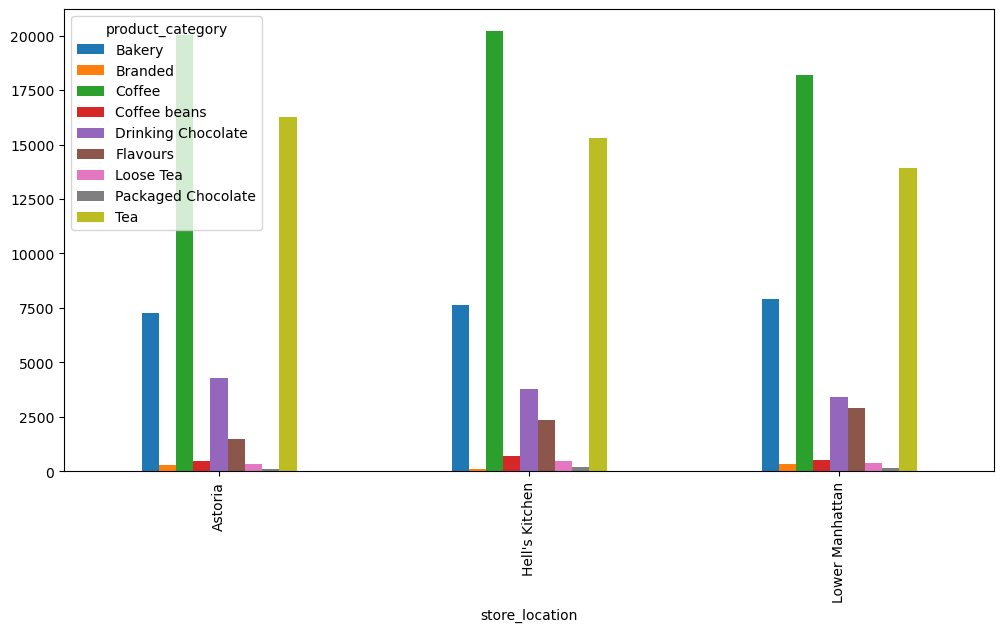

In [43]:
x = df.groupby(['store_location','product_category']).size().unstack()
x.plot(kind = 'bar',figsize = (12,6))

<Axes: xlabel='store_location'>

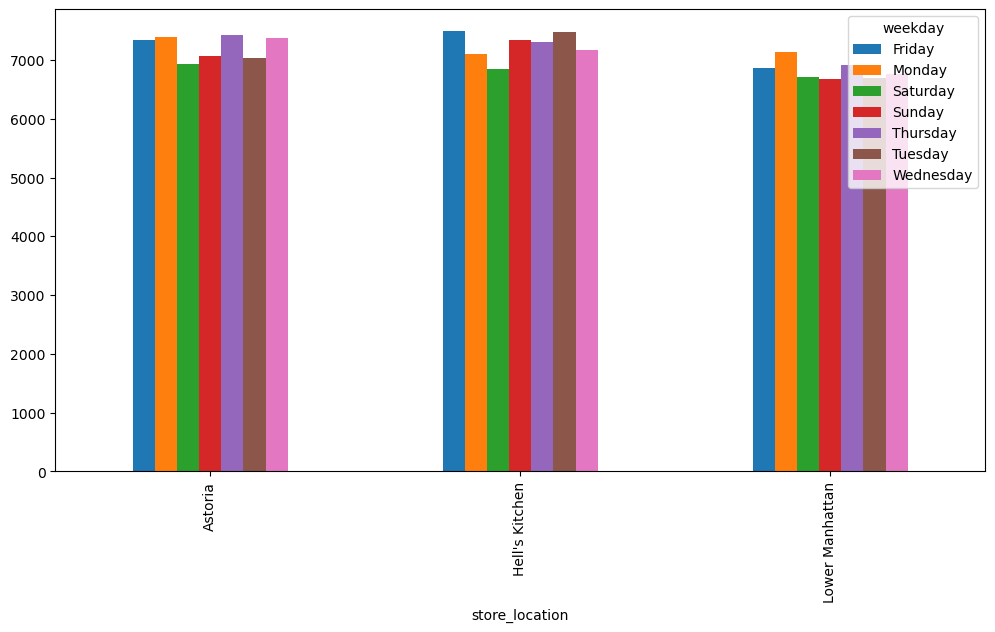

In [44]:
x = df.groupby(['store_location','weekday']).size().unstack()
x.plot(kind = 'bar',figsize = (12,6))